# Import libraries

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, datetime
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Loading dataset

In [111]:
data=pd.read_csv('C:\\Users\\USER\\Desktop\\nba\\collegePlace.csv')
data.head(5)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [112]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2966.0,21.485840,1.324933,19.0,21.0,21.0,22.0,30.0
Internships,2966.0,0.703641,0.740197,0.0,0.0,1.0,1.0,3.0
CGPA,2966.0,7.073837,0.967748,5.0,6.0,7.0,8.0,9.0
Hostel,2966.0,0.269049,0.443540,0.0,0.0,0.0,1.0,1.0
HistoryOfBacklogs,2966.0,0.192178,0.394079,0.0,0.0,0.0,0.0,1.0
PlacedOrNot,2966.0,0.552596,0.497310,0.0,0.0,1.0,1.0,1.0


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [114]:
data.shape

(2966, 8)

# preprocessing of data

In [115]:
data.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

 
  # Exploratory analysis    

<AxesSubplot:>

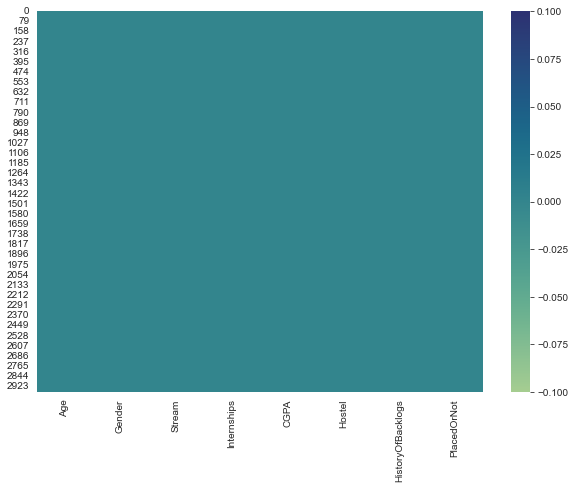

In [116]:
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull(), cmap = 'crest')

Text(0.5, 1.0, 'Data Correlation')

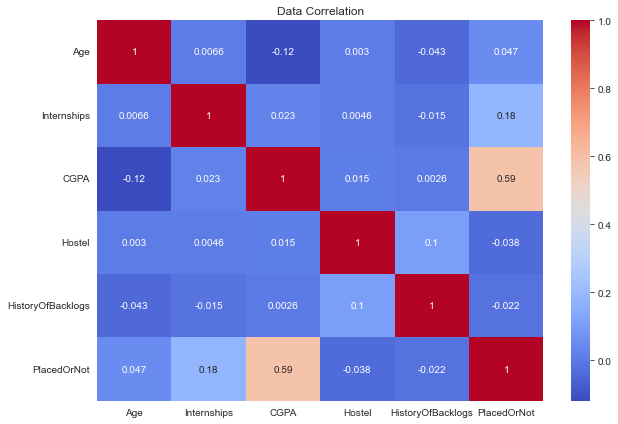

In [117]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), cmap = 'coolwarm', annot = True)
plt.title('Data Correlation')

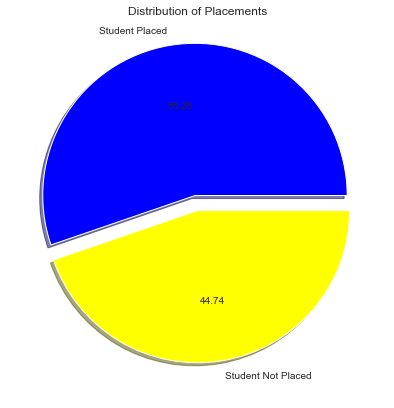

In [118]:

sns.set_style('darkgrid')
plt.figure(figsize=(10,7))
#sns.countplot(x = data['PlacedOrNot'], palette='Set2')
plt.pie(x = data['PlacedOrNot'].value_counts(), 
       labels=['Student Placed','Student Not Placed'],
       colors=['blue', 'yellow'],
       explode = (0.1,0),
       shadow = True,
       autopct='%.2f'
       )
plt.title('Distribution of Placements')
plt.show()

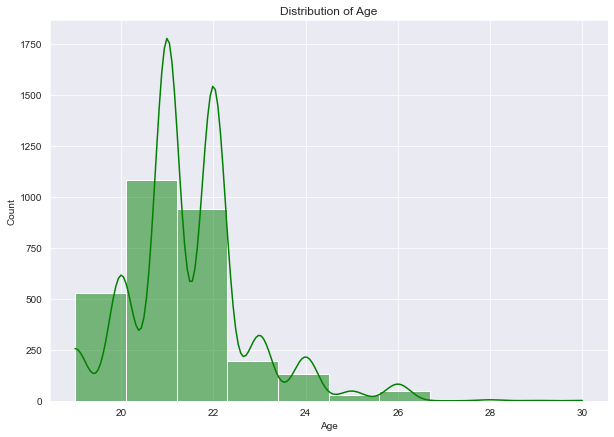

In [119]:
plt.figure(figsize=(10,7))
sns.histplot(data['Age'], kde = True , color='green', bins = 10)
plt.title('Distribution of Age')
plt.show()

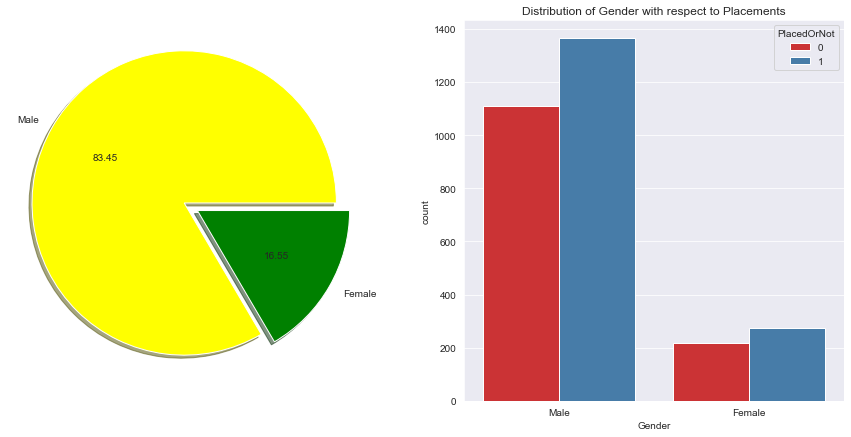

In [120]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.pie(x = data['Gender'].value_counts(), 
       labels=['Male','Female'],
       colors=['yellow', 'green'],
       explode = (0.1,0),
       shadow = True,
       autopct='%.2f'
       )
plt.subplot(1,2,2)
sns.countplot(x = data['Gender'], hue = data['PlacedOrNot'],palette='Set1')
plt.title('Distribution of Gender with respect to Placements')
plt.show()

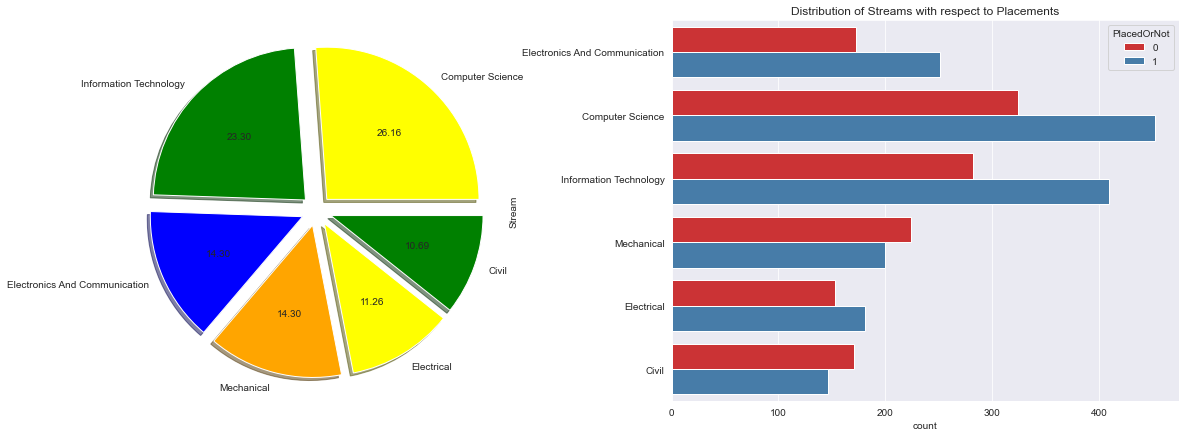

In [121]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.pie(x = data['Stream'].value_counts(), 
       labels=['Computer Science', 'Information Technology',
       'Electronics And Communication', 'Mechanical', 'Electrical', 'Civil'],
       colors=['yellow','green','blue','orange'],
       explode = (0.1,0.1,0.1,0.1,0.1,0.1),
       shadow = True,
       autopct='%.2f'
       )
plt.subplot(1,2,2)
sns.countplot(y= data['Stream'], hue = data['PlacedOrNot'],palette='Set1')

plt.title('Distribution of Streams with respect to Placements')
plt.show()

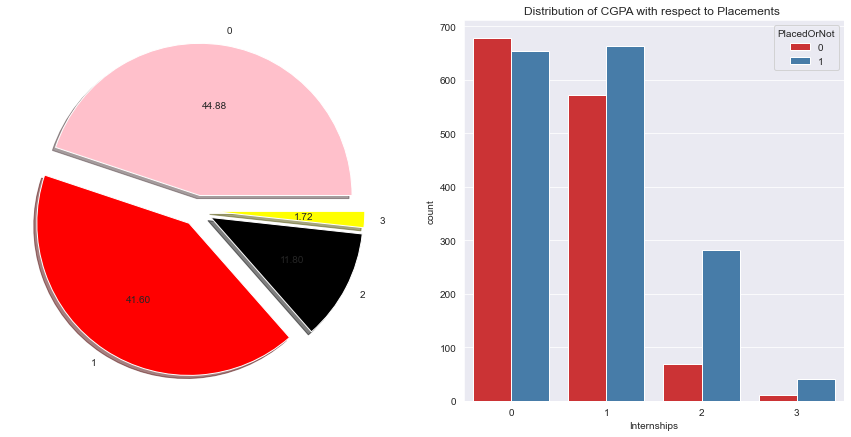

In [122]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.pie(x = data['Internships'].value_counts(), 
       labels=[0, 1, 2, 3],
       colors=['pink','red','black','yellow'],
       explode = (0.1,0.1,0.1,0.1),
       shadow = True,
       autopct='%.2f'
       )
plt.subplot(1,2,2)
sns.countplot(x = data['Internships'], hue = data['PlacedOrNot'],palette='Set1')

plt.title('Distribution of CGPA with respect to Placements ')
plt.show()

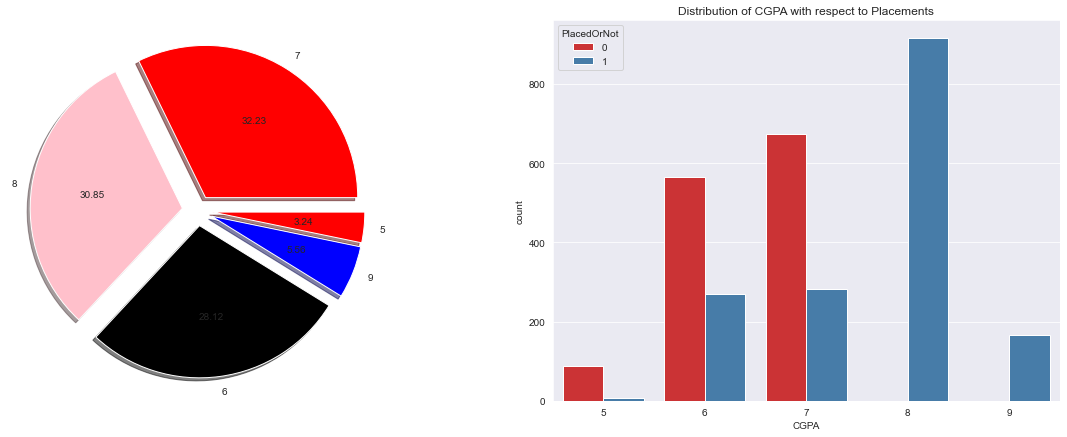

In [123]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.pie(x = data['CGPA'].value_counts(), 
       labels=[7, 8, 6, 9, 5],
       colors=['red','pink','black','blue'],
       explode = (0.1,0.1,0.1,0.1,0.1),
       shadow = True,
       autopct='%.2f')
       
plt.subplot(1,2,2)
sns.countplot(x= data['CGPA'], hue = data['PlacedOrNot'],palette='Set1')

plt.title('Distribution of CGPA with respect to Placements')
plt.show()

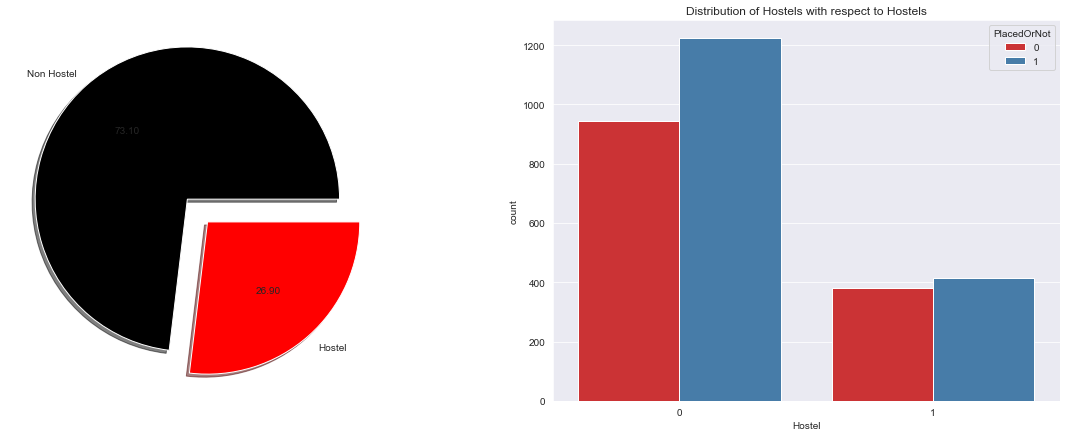

In [124]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.pie(x = data['Hostel'].value_counts(), 
       labels=['Non Hostel','Hostel'],
       colors=['black','red'],
       explode = (0.1,0.1),
       shadow = True,
       autopct='%.2f')
       
plt.subplot(1,2,2)
sns.countplot(x= data['Hostel'], hue = data['PlacedOrNot'],palette='Set1')

plt.title('Distribution of Hostels with respect to Hostels')
plt.show()

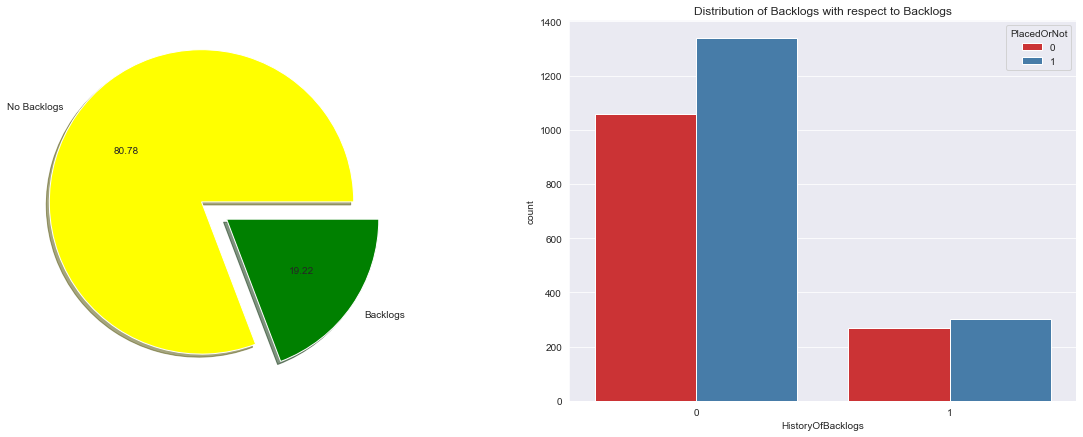

In [125]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.pie(x = data['HistoryOfBacklogs'].value_counts(), 
       labels=['No Backlogs','Backlogs'],
       colors=['yellow','green'],
       explode = (0.1,0.1),
       shadow = True,
       autopct='%.2f')
       
plt.subplot(1,2,2)
sns.countplot(x= data['HistoryOfBacklogs'], hue = data['PlacedOrNot'],palette='Set1')

plt.title('Distribution of Backlogs with respect to Backlogs')
plt.show()

# Train and Test

In [126]:
data['Gender'] = data['Gender'].map({'Male':1,'Female':0})
data = pd.get_dummies(data = data , columns=['Stream'])

x = data.drop(columns='PlacedOrNot')
y = data['PlacedOrNot']

In [127]:
x

,Age,Gender,Internships,CGPA,Hostel,HistoryOfBacklogs,Stream_Civil,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical
0,22,1,1,8,1,1,0,0,0,1,0,0
1,21,0,0,7,1,1,0,1,0,0,0,0
2,22,0,1,6,0,0,0,0,0,0,1,0
3,21,1,0,8,0,1,0,0,0,0,1,0
4,22,1,0,8,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2961,23,1,0,7,0,0,0,0,0,0,1,0
2962,23,1,1,7,1,0,0,0,0,0,0,1
2963,22,1,1,7,0,0,0,0,0,0,1,0
2964,22,1,1,7,0,0,0,1,0,0,0,0


In [128]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.33, random_state=42)
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(x_train , y_train)
Score = RandomForestClassifier.score(x_test,y_test)
Score

0.8804902962206334

In [129]:
from sklearn.linear_model import LogisticRegression
LogisticRegression = LogisticRegression()
LogisticRegression.fit(x_train,y_train)
Score_2 = LogisticRegression.score(x_test , y_test)
Score_2

0.7477017364657814